In [99]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns
from scipy import spatial
from sent2vec.vectorizer import Vectorizer
import pandas as pd
from prophet import Prophet

In [78]:
df= pd.read_csv('we1775srv$_time.csv',low_memory=False)
data = list(df['message'])

['08/28/2016 23:59:00 PM\nLogName=Security\nSourceName=Microsoft Windows security auditing.\nEventCode=4703\nEventType=0\nType=Information\nComputerName=we1775srv.waynecorpinc.local\nTaskCategory=Authorization Policy Change\nOpCode=Info\nRecordNumber=516329\nKeywords=Audit Success\nMessage=A user right was adjusted.\n\nSubject:\n\tSecurity ID:\t\tNT AUTHORITY\\SYSTEM\n\tAccount Name:\t\twe1775srv$\n\tAccount Domain:\t\tWAYNECORPINC\n\tLogon ID:\t\t0x3E7\n\nTarget Account:\n\tSecurity ID:\t\tNT AUTHORITY\\SYSTEM\n\tAccount Name:\t\twe1775srv$\n\tAccount Domain:\t\tWAYNECORPINC\n\tLogon ID:\t\t0x3E7\n\nProcess Information:\n\tProcess ID:\t\t0x3b8\n\tProcess Name:\t\tC:\\Windows\\System32\\svchost.exe\n\nEnabled Privileges:\n\t\t\tSeAssignPrimaryTokenPrivilege\n\t\t\tSeIncreaseQuotaPrivilege\n\t\t\tSeSecurityPrivilege\n\t\t\tSeTakeOwnershipPrivilege\n\t\t\tSeLoadDriverPrivilege\n\t\t\tSeSystemtimePrivilege\n\t\t\tSeBackupPrivilege\n\t\t\tSeRestorePrivilege\n\t\t\tSeShutdownPrivilege\n\t\t

In [80]:
patt4 = []
time = []

things = ['EventCode', 'TaskCategory', 'Message', 'Impersonation Level', 'Token Elevation Type', 'Source Address', 'Source Port', 'Logon Type', 'OpCode', 'Type', 'Keywords', 'Subject ID', 'Object Type', 'Access Mask', 'Accesses', 'Share Name', 'Share Path', 'New Process Name', 'Process Name', 'Creator Process Name', 'Process Command Line', 'Object Server', 'Access Reasons', 'Privileges Used for Access Check', 'Resource Attributes', 'Enabled Privileges', 'Privileges', 'Relative Target Name', 'SYNCHRONIZE', 'ReadAttributes', 'Logon Process Name', 'Group Name', 'Group Domain', 'Name', 'Original Security Descriptor', 'New Security Descriptor']

for patt in data:

    patt2 = patt.replace('\n','|')
    patt2 = patt2.replace(':|\t','|')
    patt2 = patt2.replace(':\t','|')
    patt2 = patt2.replace('=','|')
    patt2 = patt2.replace('\t','')
    patt3 = patt2.split('|')
    msg = ''
    for j in things:
        if j in patt3:
            index = patt3.index(j) + 1
            msg = msg + ' ' + patt3[index]

    patt4.append(msg)
diction = {'ds': df['ds'], 'user': patt4, 'user1': patt4, 'user2': patt4, 'user3': patt4}

In [81]:
df2 = pd.DataFrame(diction)

df2.to_csv('multi_user.csv')

print(df2)

                              ds  \
0    2016-08-28 17:59:00.000 MDT   
1    2016-08-28 17:58:04.000 MDT   
2    2016-08-28 17:55:17.000 MDT   
3    2016-08-28 17:53:02.000 MDT   
4    2016-08-28 17:31:02.000 MDT   
..                           ...   
433  2016-08-26 16:23:58.000 MDT   
434  2016-08-26 16:23:21.000 MDT   
435  2016-08-26 16:21:03.000 MDT   
436  2016-08-26 16:19:47.000 MDT   
437  2016-08-26 16:18:05.000 MDT   

                                                  user  \
0     4703 Authorization Policy Change A user right...   
1     4703 Authorization Policy Change A user right...   
2     4703 Authorization Policy Change A user right...   
3     4703 Authorization Policy Change A user right...   
4     4688 Process Creation A new process has been ...   
..                                                 ...   
433   4689 Process Termination A process has exited...   
434   4703 Authorization Policy Change A user right...   
435   4624 Logon An account was successfully 

In [82]:
data3 = pd.read_csv('multi_user.csv')

bert = [1]
for user in data3:
    if 'user' in user:
        vector = Vectorizer()
        user = list(data3[user])
        vector.run(user)
        bert.append(vector.vectors)

dist_1 = spatial.distance.cosine(bert[2][0], bert[1][0])
print('dist_1:',dist_1)

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


TypeError: 'int' object is not subscriptable

In [83]:
def nCr(n, r):
	if r > n:
		return 0
	if r == 0 or r == n:
		return 1
	return nCr(n-1, r-1) + nCr(n-1, r)

n=4
comb = []
for val in range(n):
    comb.append(val+1)
comb = comb[::-1]
final_col = []

def comparison(elements):
    swapped = False
    for index,vec in enumerate(bert[1]):
        max_find = []
        elements = elements[::-1]
        for n in range(len(elements)-1, 0, -1):
            for i in range(n):
                if elements[i] < elements[i + 1]:
                    swapped = True
                    elements[i], elements[i + 1] = elements[i + 1], elements[i]
                    dist_1 = spatial.distance.cosine(bert[elements[i]][index], bert[elements[i+1]][index])
                    max_find.append(dist_1)

                if not swapped:
                    return
        final_col.append(max(max_find))

comparison(comb)


Unsorted list is,
[4, 3, 2, 1]


In [89]:
dat = {'ds':df['ds'],'y':final_col}
dat = pd.DataFrame(dat)

c:\users\k tech\appdata\local\programs\python\python379\lib\site-packages\dateutil\parser\_parser.py:1212: UnknownTimezoneWarning: tzname MDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


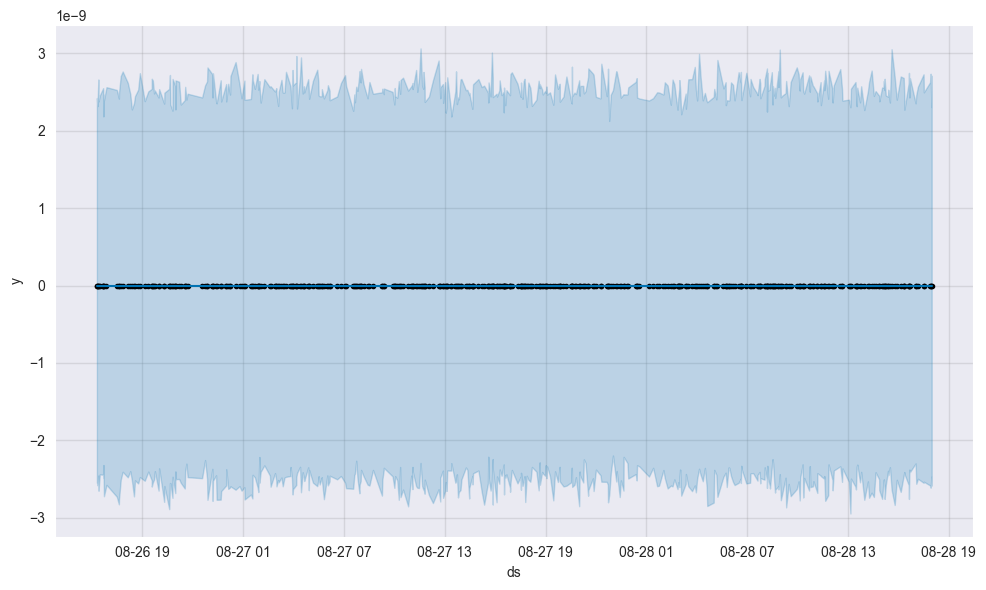

In [91]:
# Add seasonality
model = Prophet(interval_width=0.99)

# Fit the model on the training dataset
model.fit(dat)


forecast = model.predict(dat)

# Visualize the forecast
model.plot(forecast); #

In [92]:
# Merge actual and predicted values

performance =pd.concat([dat, forecast[[ 'yhat', 'yhat_lower', 'yhat_upper']]],
                  axis = 1)
# performance = pd.merge(df, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='left')
print(performance)

                              ds  y  yhat    yhat_lower    yhat_upper
0    2016-08-28 17:59:00.000 MDT  0   0.0 -2.544929e-09  2.424668e-09
1    2016-08-28 17:58:04.000 MDT  0   0.0 -2.558885e-09  2.317875e-09
2    2016-08-28 17:55:17.000 MDT  0   0.0 -2.583840e-09  2.408799e-09
3    2016-08-28 17:53:02.000 MDT  0   0.0 -2.454134e-09  2.663932e-09
4    2016-08-28 17:31:02.000 MDT  0   0.0 -2.650654e-09  2.379046e-09
..                           ... ..   ...           ...           ...
433  2016-08-26 16:23:58.000 MDT  0   0.0 -2.534141e-09  2.497323e-09
434  2016-08-26 16:23:21.000 MDT  0   0.0 -2.582317e-09  2.626824e-09
435  2016-08-26 16:21:03.000 MDT  0   0.0 -2.611612e-09  2.737788e-09
436  2016-08-26 16:19:47.000 MDT  0   0.0 -2.468977e-09  2.307635e-09
437  2016-08-26 16:18:05.000 MDT  0   0.0 -2.584088e-09  2.711948e-09

[438 rows x 5 columns]


In [95]:
# Check MAE value
performance_MAE = mean_absolute_error(performance['y'], performance['yhat'])
print(f'The MAE for the model is {performance_MAE}')

# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MAE for the model is 0.0
The MAPE for the model is 0.0


In [97]:
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)

# Check the number of anomalies
performance['anomaly'].value_counts()

0    438
Name: anomaly, dtype: int64

In [98]:
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
anomalies

,ds,y,yhat,yhat_lower,yhat_upper,anomaly


c:\users\k tech\appdata\local\programs\python\python379\lib\site-packages\dateutil\parser\_parser.py:1212: UnknownTimezoneWarning: tzname MDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
c:\users\k tech\appdata\local\programs\python\python379\lib\site-packages\dateutil\parser\_parser.py:1212: UnknownTimezoneWarning: tzname MDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
c:\users\k tech\appdata\local\programs\python\python379\lib\site-packages\dateutil\parser\_parser.py:1212: UnknownTimezoneWarning: tzname MDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=U

<AxesSubplot:xlabel='ds', ylabel='y'>

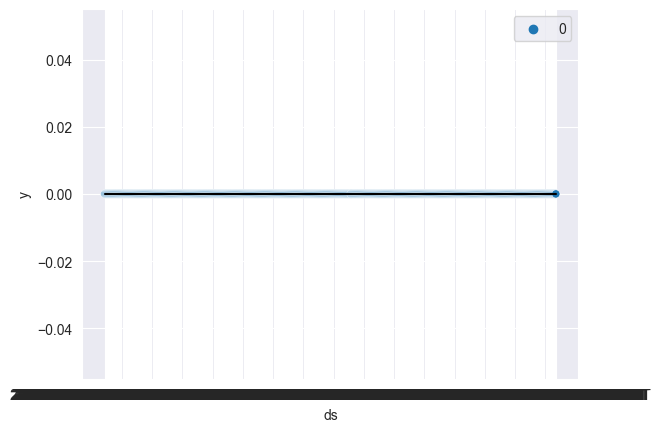

In [100]:
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')